In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/times.ttf')
plt.rc('font',family='Times New Roman')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_1380489/3305415658.py:60: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


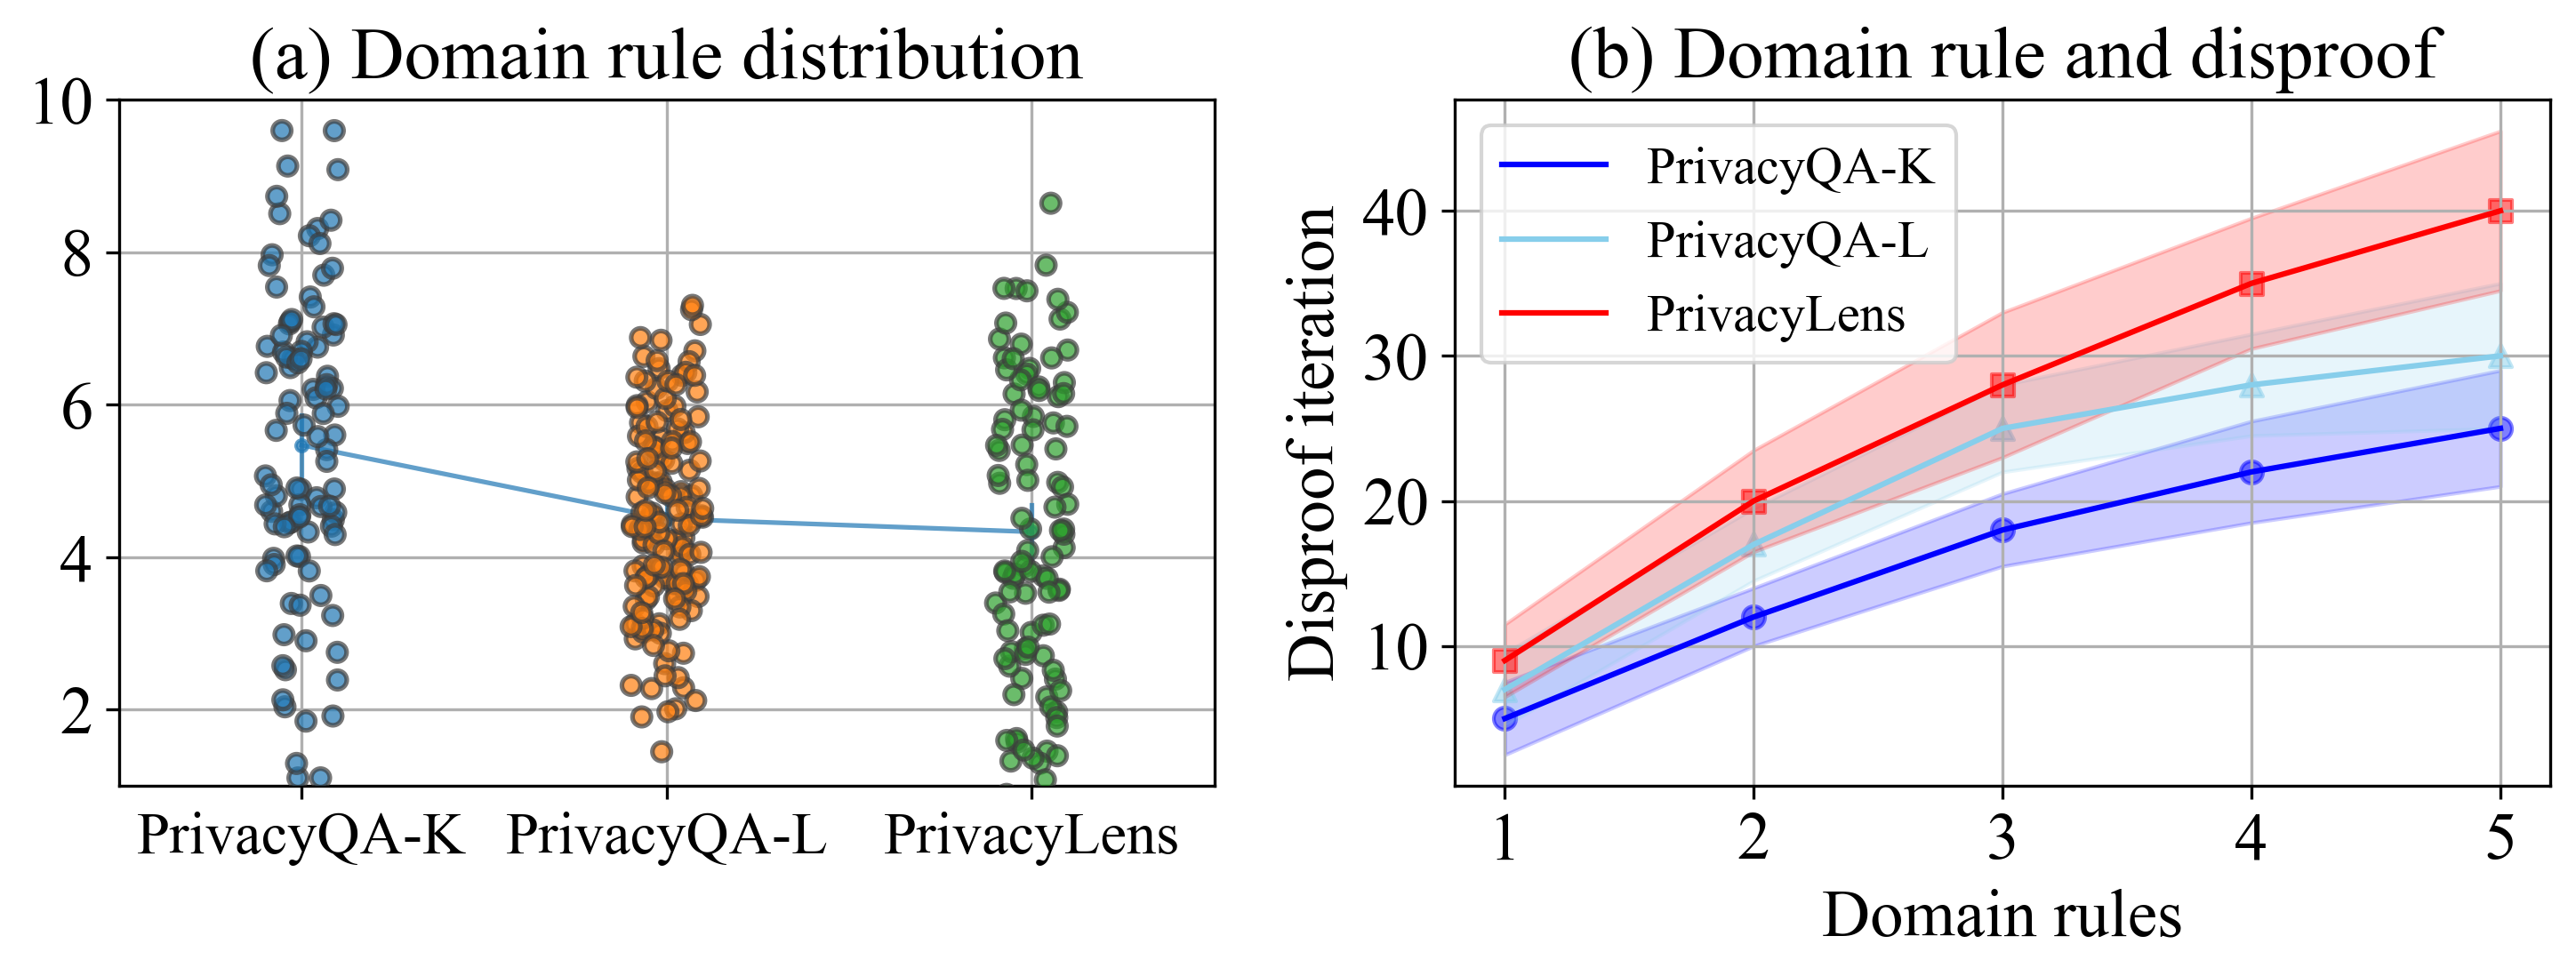

In [70]:
np.random.seed(10)

def genlu(mean, std):
    mean = np.array(mean)
    std = np.array(std)
    half_reward_std = std / 2.0
    lower = [x - y for x, y in zip(mean, half_reward_std)]
    upper = [x + y for x, y in zip(mean, half_reward_std)]
    return lower, upper, mean

def rule_plot(ax, mean, std, color, label, marker):
    lower, upper, mean= genlu(mean, std)
    xaxis = [1,2,3,4,5]
    ax.plot(xaxis, mean, color=color, label=label)
    ax.scatter(xaxis, mean, color=color, marker=marker, alpha=0.5)
    ax.fill_between(xaxis, lower, upper, color=color, alpha=0.2)
    ax.set_xlabel('Domain rules')
    ax.set_ylabel('Disproof iteration')
    ax.set_title('(b) Domain rule and disproof', fontsize=20)
    # ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.legend(ncols=1, fontsize=14)

# data = [
#     np.random.uniform(15,25, 150)+np.random.normal(20, 3, 150),  # 第一组数据
#     np.random.uniform(5, 8, 100)+np.random.normal(5, 1, 100),  # 第二组数据
# ]
data = [
    np.random.uniform(1,8, 100)+ np.random.normal(1, 1, 100),
    np.random.uniform(2,5, 150)+np.random.normal(1, 1, 150),
    np.random.uniform(1,6, 100)+np.random.normal(1, 1, 100), 
]
datasets=["PrivacyQA-K","PrivacyQA-L","PrivacyLens"]
label=["Location","Organization","Name","Email","Phone"]
x=range(2)
bar_width = 0.16

plt.rcParams.update({'font.size': 18})

fig, ax =plt.subplots(1,2,constrained_layout=True, figsize=(10, 4),dpi=300)

# sns.violinplot(data=data, ax=ax[0], alpha=0.7, linewidth=1.25, inner='quartile')
sns.stripplot(data=data, ax=ax[0], alpha=0.7, linewidth=1.25, jitter=True)
sns.pointplot(data=data, ax=ax[0], alpha=0.7, linewidth=1.25)
ax[0].set_ylim(1, 10)
ax[0].set_title("(a) Domain rule distribution", fontsize=20)
ax[0].set_xticks(ticks=np.arange(len(datasets)), labels=datasets, fontsize=16)
ax[0].grid()
# ax[0].yaxis.set_major_locator(MaxNLocator(integer=True))
# ax[0].set_xlabel("(a)",fontsize=20)


ax[1].legend(ncol=1, loc='upper left', fontsize=12)
rule_plot(ax[1], [5,12,18,22,25], [5, 4, 5,7, 8], "blue", "PrivacyQA-K", "o")
rule_plot(ax[1], [7,17,25,28,30], [5, 5, 6,7,10], "skyblue", "PrivacyQA-L", "^")
rule_plot(ax[1], [9,20,28,35,40], [5, 7, 10,9, 11], "red", "PrivacyLens", "s")
ax[1].grid()


plt.tight_layout()
plt.savefig("fig.domainruledisproof.svg", bbox_inches='tight')
plt.savefig("fig.domainruledisproof.jpg", bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipykernel_1380489/656686961.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


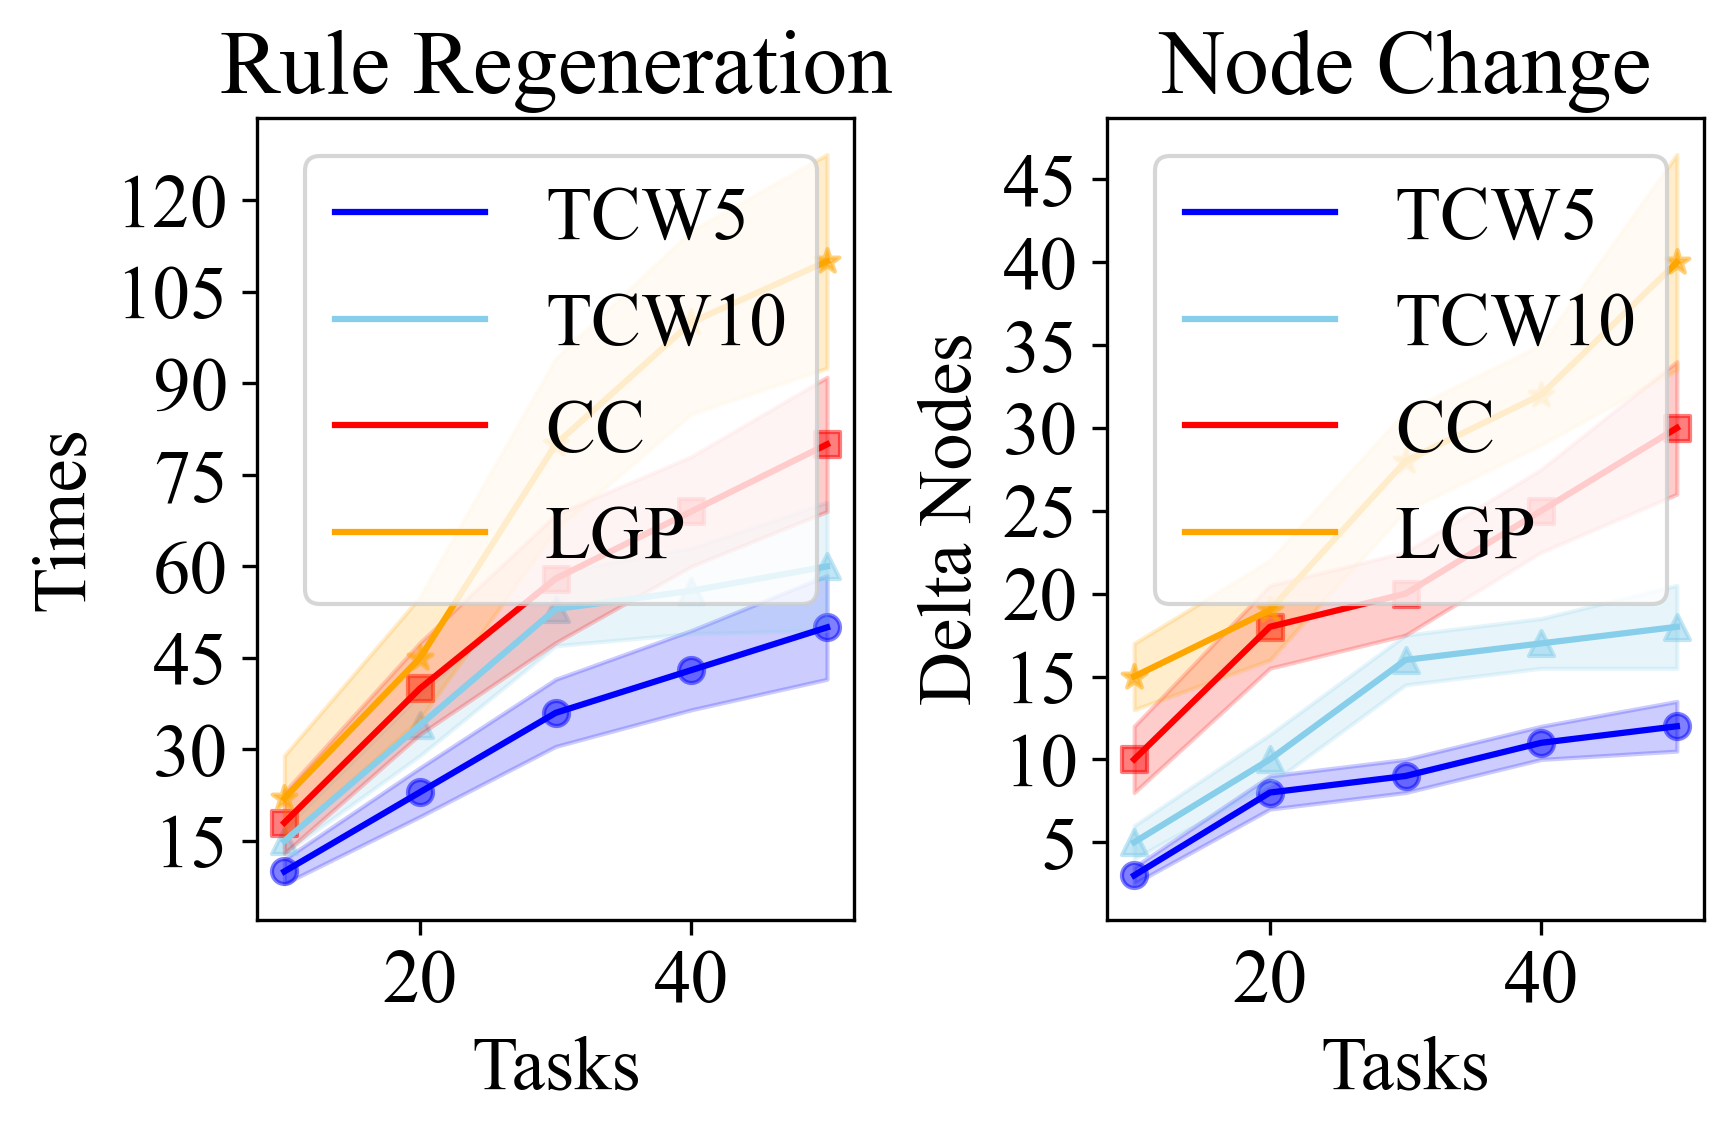

In [26]:
def genlu(mean, std):
    mean = np.array(mean)
    std = np.array(std)
    half_reward_std = std / 2.0
    lower = [x - y for x, y in zip(mean, half_reward_std)]
    upper = [x + y for x, y in zip(mean, half_reward_std)]
    return lower, upper, mean

def rule_plot(ax, mean, std, color, label, marker):
    lower, upper, mean= genlu(mean, std)
    xaxis = [10,20,30,40,50]
    ax.plot(xaxis, mean, color=color, label=label)
    ax.scatter(xaxis, mean, color=color, marker=marker, alpha=0.5)
    ax.fill_between(xaxis, lower, upper, color=color, alpha=0.2)
    ax.set_xlabel('Tasks')
    ax.set_ylabel('Times')
    ax.set_title('Rule Regeneration')
    # ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.legend()
    
def node_plot(ax, mean, std, color, label, marker):
    lower, upper, mean= genlu(mean, std)
    xaxis = [10,20,30,40,50]
    ax.plot(xaxis, mean, color=color, label=label)
    ax.scatter(xaxis, mean, color=color, marker=marker, alpha=0.5)
    ax.fill_between(xaxis, lower, upper, color=color, alpha=0.2)
    ax.set_xlabel('Tasks')
    ax.set_ylabel('Delta Nodes')
    ax.set_title('Node Change')
    # ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.legend()

fig, ax =plt.subplots(1,2,constrained_layout=True, figsize=(6, 4),dpi=300)


plt.subplot(1, 2, 1)
rule_plot(ax[0], [10,23,36,43,50], [4, 8, 11,13, 17], "blue", "TCW5", "o")
rule_plot(ax[0], [15,34,53,56,60], [4, 10, 12,14,21], "skyblue", "TCW10", "^")
rule_plot(ax[0], [18,40,58,69,80], [10, 15, 21,18, 22], "red", "CC", "s")
rule_plot(ax[0], [22,45,80,100,110], [14, 20, 28,30,35], "orange", "LGP", "*")

plt.subplot(1, 2, 2)
node_plot(ax[1], [3,8,9,11,12], [1, 2, 2, 2,3], "blue", "TCW5", "o")
node_plot(ax[1], [5,10,16,17,18], [2, 3, 3, 3,5], "skyblue", "TCW10", "^")
node_plot(ax[1], [10,18,20,25,30], [4, 5,5,5,8], "red", "CC", "s")
node_plot(ax[1], [15,19,28,32,40], [4, 6, 6, 6,13], "orange", "LGP", "*")

plt.rcParams.update({'font.size': 14})
plt.tight_layout()
plt.savefig("fig.regeneration.svg", bbox_inches='tight')
plt.savefig("fig.regeneration.jpg", bbox_inches='tight', dpi=300)
plt.show()